In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from keras.callbacks import ModelCheckpoint, EarlyStopping
import tensorflow_hub as hub
from keras.models import load_model
from sklearn.metrics import confusion_matrix , classification_report

In [ ]:
df = pd.read_csv('/content/train_data.csv')
df

,ID,Class,C1,C2,C3,C4,C5,C6,C7,C8,...,C2491,C2492,C2493,C2494,C2495,C2496,C2497,C2498,C2499,C2500
0,3999,4,253,253,253,253,253,253,253,253,...,253,253,253,253,253,253,253,253,253,253
1,2282,13,19,17,17,19,20,22,27,33,...,29,67,28,21,28,76,48,11,39,74
2,2086,26,216,217,219,221,224,226,228,229,...,214,214,213,213,213,212,212,212,213,213
3,3475,13,215,209,202,211,219,198,185,200,...,181,183,169,170,174,170,175,172,154,151
4,3526,23,251,252,253,253,253,253,253,253,...,252,251,255,247,239,245,254,253,252,249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,3606,26,212,222,212,220,216,142,169,173,...,108,51,74,85,102,111,116,113,135,130
928,1478,3,188,112,167,183,177,181,178,180,...,163,171,129,51,160,113,56,135,133,133
929,1268,13,169,169,169,169,169,169,169,169,...,38,39,31,24,12,37,35,47,29,68
930,1409,21,253,253,253,253,254,253,253,253,...,76,76,76,74,70,75,77,76,70,185


In [ ]:
#Repetition of less classes
# less_class = df.loc[df.Class.isin([1,9,18])]
# less_class
# df5 = df.append(less_class, ignore_index = True)
# df5.shape

(1115, 2502)

In [ ]:
# df5.Class.value_counts()

In [ ]:
X_train = df.drop('Class',axis='columns')
y_train = df['Class']
y_train = y_train.to_numpy()
X_train.shape

(932, 2501)

In [ ]:
df2 = pd.read_csv('/content/test_data.csv')
X_test = df2.drop('Class',axis='columns')
y_test = df2['Class']
y_test = y_test.to_numpy()
y_test_ids = df2['ID']
y_test_ids

0      1869
1      2221
2      3971
3      1309
4      2442
       ... 
395    1036
396    3651
397    3000
398    2518
399    1472
Name: ID, Length: 400, dtype: int64

In [ ]:
X_train

,ID,C1,C2,C3,C4,C5,C6,C7,C8,C9,...,C2491,C2492,C2493,C2494,C2495,C2496,C2497,C2498,C2499,C2500
0,3999,253,253,253,253,253,253,253,253,253,...,253,253,253,253,253,253,253,253,253,253
1,2282,19,17,17,19,20,22,27,33,26,...,29,67,28,21,28,76,48,11,39,74
2,2086,216,217,219,221,224,226,228,229,230,...,214,214,213,213,213,212,212,212,213,213
3,3475,215,209,202,211,219,198,185,200,196,...,181,183,169,170,174,170,175,172,154,151
4,3526,251,252,253,253,253,253,253,253,252,...,252,251,255,247,239,245,254,253,252,249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,3606,212,222,212,220,216,142,169,173,183,...,108,51,74,85,102,111,116,113,135,130
928,1478,188,112,167,183,177,181,178,180,181,...,163,171,129,51,160,113,56,135,133,133
929,1268,169,169,169,169,169,169,169,169,166,...,38,39,31,24,12,37,35,47,29,68
930,1409,253,253,253,253,254,253,253,253,253,...,76,76,76,74,70,75,77,76,70,185


In [ ]:
img1 = X_train.drop('ID',axis='columns')

img2 = img1.to_numpy()

img3 = X_test.drop('ID',axis='columns')
img4 = img3.to_numpy()
len(img4)

400

In [ ]:
#Reshaping for CNN
img4_cnn = img4.reshape(-1,50,50,1)
img4_cnn.shape

(400, 50, 50, 1)

(50, 50)


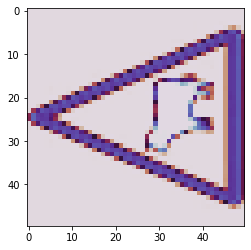

In [ ]:
m = np.reshape(img4[0],[50,50])
print(m.shape)
img6 = plt.imshow(m,cmap='twilight',interpolation='nearest')
  

In [ ]:
plt.imsave("Image_from_array.png", m)

(400, 2500)


In [ ]:
#Uncomment for Data scaling
# img2 = img2/255.0
# img2

# img4 = img4/255.0
# img4

# img4_cnn = img4_cnn/255.0
# img4_cnn


In [ ]:
#Resampling - Imbalance dataset check
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import ADASYN

smote = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
# smote = ADASYN()
X_sm, y_sm = smote.fit_resample(img2, y_train)



In [ ]:
# Splitting into train and validation  
from sklearn.model_selection import train_test_split
X_tr, X_te, y_tr, y_te = train_test_split(img2, y_train, test_size=0.2, random_state=2)
# X_tr, X_te, y_tr, y_te = train_test_split(X_sm, y_sm, test_size=0.3, random_state=2)
# X = np.concatenate((X_tr, X_te))
# y = np.concatenate((y_tr, y_te))

In [ ]:
X_tr.shape

In [ ]:
img4.shape

In [ ]:
#ANN with No validation
model = keras.Sequential([
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(4000, activation='relu'),
    keras.layers.Dense(31, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(img2, y_train, epochs=40)

In [ ]:
#ANN With validation
ann = keras.Sequential([
    keras.layers.Dense(2500,activation='relu'),
    keras.layers.Dense(4000, activation='relu'),
    keras.layers.Dense(31, activation='softmax')
])

ann.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_tr, y_tr, epochs=30)

In [ ]:
#Reshaping for CNN
X_tr_2 = X_tr.reshape(-1,50,50,1)
X_tr_2.shape

In [ ]:
#Reshaping for CNN
X_te_2 = X_te.reshape(-1,50,50,1)
X_te_2.shape

In [ ]:
#Data augmentation
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.2),
    layers.experimental.preprocessing.RandomTranslation(0.2,0.2)
  ]
)

In [ ]:
# Callbacks
callbacks = [
    keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor='val_loss',
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=0,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=25,
        verbose=1)
]

In [ ]:
#CNN - w/o dropout
cnn_1 = keras.Sequential([
    # data_augmentation,

    keras.layers.Conv2D(filters=64, kernel_size=(2,2), activation='relu',input_shape=(50,50,1)),
    keras.layers.MaxPooling2D((2,2)),

    # keras.layers.Dropout(0.5),
    
    
    keras.layers.Conv2D(filters=128, kernel_size=(2,2),activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),

    # keras.layers.Dropout(0.5),

    keras.layers.Conv2D(filters=256, kernel_size=(2,2), activation='relu'),
    keras.layers.MaxPooling2D((2,2)), 

    # keras.layers.Dropout(0.5),   

    keras.layers.Flatten(),  
      
    keras.layers.Dense(400, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(31, activation='softmax')
])

cnn_1.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy', #sparse_categorical_crossentropy
              metrics=['accuracy'])

cnn_1.fit(X_tr_2, y_tr, epochs=15,validation_data=(X_te_2, y_te),callbacks=callbacks)

In [ ]:
#CNN - with dropout
cnn_2 = keras.Sequential([
    # data_augmentation,

    keras.layers.Conv2D(filters=64, kernel_size=(2,2), activation='relu',input_shape=(50,50,1)),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Dropout(0.5),
    
    
    keras.layers.Conv2D(filters=128, kernel_size=(2,2),activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Dropout(0.5),

    keras.layers.Conv2D(filters=256, kernel_size=(2,2), activation='relu'),
    keras.layers.MaxPooling2D((2,2)), 

    keras.layers.Dropout(0.5),   

    keras.layers.Flatten(),  
      
    keras.layers.Dense(400, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(31, activation='softmax')
])

cnn_2.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy', #sparse_categorical_crossentropy
              metrics=['accuracy'])

cnn_2.fit(X_tr_2, y_tr, epochs=120,validation_data=(X_te_2, y_te),callbacks=callbacks)

In [ ]:
#Classification report for ANN

y_preds_1 = ann.predict(X_te)
y_preds_1 = [np.argmax(i) for i in y_preds_1]
print("Classification Report: \n", classification_report(y_te, y_preds_1))

report_1 = classification_report(y_te, y_preds_1, output_dict=True)
report_1_df = pd.DataFrame(report_1).transpose()
report_1_df.to_csv('ANN.csv')

In [ ]:
#Classification report For CNN - w/o dropout

y_preds_2 = cnn_1.predict(X_te_2)
y_preds_2 = [np.argmax(i) for i in y_preds_2]
print("Classification Report: \n", classification_report(y_te, y_preds_2))

report_2 = classification_report(y_te, y_preds_2, output_dict=True)
report_2_df = pd.DataFrame(report_2).transpose()
report_2_df.to_csv('CNN-1.csv')

In [ ]:
#Classification report For CNN - with dropout
# cnn.evaluate(X_te_2, y_te)
y_preds_3 = cnn_2.predict(X_te_2)
y_preds_3 = [np.argmax(i) for i in y_preds_3]
print("Classification Report: \n", classification_report(y_te, y_preds_3))

report_3 = classification_report(y_te, y_preds_3, output_dict=True)
report_3_df = pd.DataFrame(report_3).transpose()
report_3_df.to_csv('CNN-2.csv')


In [ ]:
# model.evaluate(X_te, y_te)

3/3 [==============================] - 0s 30ms/step - loss: 2.1222 - accuracy: 0.7766


[2.1221585273742676, 0.7765957713127136]

In [ ]:
#Prediction For CNN
y_predicted_cnn = cnn_2.predict(img4_cnn)
y_predicted_cnn[0]

array([7.9233521e-27, 3.7174223e-22, 1.0000000e+00, 1.4661226e-16,
       9.9227089e-31, 3.4234647e-20, 3.3250507e-22, 1.4548663e-19,
       3.3418564e-25, 4.8764473e-27, 1.9582909e-25, 1.9008723e-19,
       1.6790679e-21, 3.4662065e-23, 2.7518438e-24, 7.9788313e-26,
       8.4212233e-25, 1.3272519e-17, 1.0881851e-14, 1.5110629e-26,
       1.9713470e-18, 8.3930993e-17, 1.2507119e-15, 1.5022548e-15,
       5.9795430e-10, 2.7393674e-18, 6.1547935e-28, 9.3419890e-24,
       1.1258126e-12, 1.9012563e-27, 8.1882488e-21], dtype=float32)

In [ ]:
# y_predicted = model.predict(img4)
# y_predicted[0]

array([1.58068929e-19, 3.47849697e-17, 9.96781945e-01, 2.46892617e-09,
       7.84336224e-19, 3.11336450e-08, 1.09584789e-07, 8.88806945e-11,
       1.87084659e-18, 1.19653384e-10, 5.27484046e-12, 1.40887261e-13,
       6.01625472e-10, 2.21033174e-11, 1.61124174e-15, 1.39666797e-19,
       1.27514182e-15, 1.25914792e-10, 4.97580052e-14, 1.65229027e-24,
       1.55728941e-09, 1.26859066e-17, 3.20524385e-10, 3.40523498e-10,
       3.20567400e-03, 5.76705683e-10, 1.71408350e-17, 1.28599726e-21,
       1.22732081e-05, 3.51630265e-19, 5.25832760e-15], dtype=float32)

In [ ]:
# y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [ ]:
#For CNN
y_predicted_labels_cnn = [np.argmax(i) for i in y_predicted_cnn]


In [ ]:
y_predicted_labels_df = pd.DataFrame(y_predicted_labels_cnn)
y_predicted_labels_df.value_counts()

In [ ]:
y_predicted_labels_cnn[0:5]

[2, 13, 19, 2, 13]

In [ ]:
m = np.reshape(img4[4],[50,50])
plt.imshow(m,cmap='twilight',interpolation='nearest')


In [ ]:
# df3 = pd.read_csv('/content/test_data.csv')
# df3['Class'] = y_predicted_labels
# df3

NameError: ignored

In [ ]:
#Reading test data For CNN
df3 = pd.read_csv('/content/test_data.csv')
df3['Class'] = y_predicted_labels_cnn
df3

,ID,Class,C1,C2,C3,C4,C5,C6,C7,C8,...,C2491,C2492,C2493,C2494,C2495,C2496,C2497,C2498,C2499,C2500
0,1869,2,253,253,253,253,253,253,253,253,...,253,253,253,253,253,253,253,253,253,253
1,2221,13,74,60,58,71,61,66,88,71,...,128,127,125,81,69,87,124,115,118,118
2,3971,19,211,210,209,208,207,207,207,207,...,200,202,148,151,120,90,111,141,110,111
3,1309,2,253,253,253,253,253,253,253,253,...,171,119,116,117,116,117,117,117,115,222
4,2442,13,134,96,77,110,75,110,144,120,...,44,55,50,40,45,48,46,48,49,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1036,8,240,235,231,224,199,160,138,139,...,104,131,106,113,141,153,182,168,123,82
396,3651,25,253,253,253,253,253,253,253,253,...,252,252,252,253,254,253,252,250,250,253
397,3000,8,66,67,67,69,70,71,72,72,...,36,43,70,83,82,61,90,98,103,103
398,2518,30,253,253,253,253,253,253,253,253,...,253,253,253,254,218,215,254,255,255,253


In [ ]:
#Writing test data to csv file
df4 = df3[['ID','Class']]
df4.to_csv('/content/result.csv',index= False)